# Bank Customer Churn Prediction using Gradient Boosting 

    
The Bank Customer Churn Prediction project using Gradient Boosting is aimed at predicting customer churn in a bank's customer base. The project involves three main stages: data preparation, exploratory data analysis (EDA), and predictive modeling. In the data preparation phase, relevant libraries and datasets are imported, ensuring the availability of necessary tools and the dataset for analysis. The EDA phase involves conducting descriptive statistics to understand the dataset's characteristics, correlation analysis to identify relationships between variables, data visualization techniques to visualize patterns and trends, and churn analysis to examine churn rates and factors influencing customer churn. Finally, in the predictive modeling phase, data preprocessing techniques are applied to prepare the data for modeling, and the Gradient Boosting algorithm is used to train and evaluate a predictive model. The project aims to provide insights into customer churn behavior and develop a reliable model for predicting customer churn based on the available features.

## Data Preparation 

### 1. Importing necessary Python Libraries 

In [2]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

###  2. Importing the dataset


In [8]:
df = pd.read_csv("D:/desktop/Portfolio/Predictive Modeling/2. Bank Customer Churn Prediction/Dataset/Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


### 3. Dropping the unneeded columns 

In [9]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Exploratory Data Analysis (EDA)

### 1. Descriptive Statistics 

This is where the descriptive statistics for each variable to understand the central tendency, dispersion, and distribution of the data.

In [62]:
# Compute descriptive statistics
statistics = df.describe()

# Print the descriptive statistics
statistics

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,1.498000,606.515100
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,1.118356,225.924839
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,0.000000,119.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,0.000000,410.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,1.000000,605.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,2.000000,801.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,3.000000,1000.000000


### 2. Correlation Analysis

This is a statistical technique used to measure the strength and direction of the relationship between two or more variables. It helps determine whether there is a systematic association between variables and to what extent they vary together. Correlation analysis provides insights into how changes in one variable are related to changes in another variable. 

In [13]:
# Correlation Analysis of all variables

corr_analysis = df.corr()
corr_analysis

C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_13752\2571826406.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_analysis = df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


### 3. Data Visualization 

Create visualizations such as histograms, box plots, scatter plots, bar charts, or correlation matrices to explore the relationships between variables and identify patterns.

C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_13752\3691112376.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1,


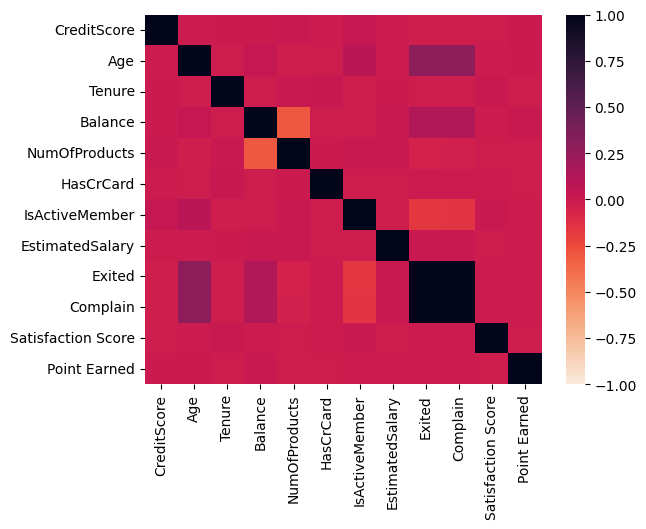

In [14]:
#Plotting heatmap to visualize the correlation or relationship between multiple variables in a dataset

sns.heatmap(df.corr(), vmin=-1, vmax=1,
annot=False,cmap="rocket_r")
plt.show()

#### 1. Credit Score

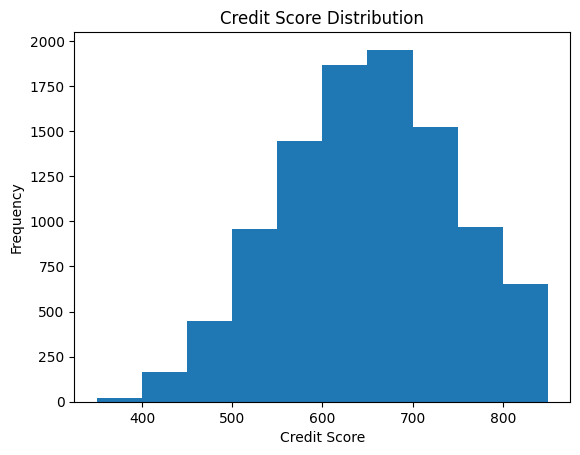

In [9]:
# Plot histogram of CreditScore

plt.hist(df['CreditScore'])
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Score Distribution')
plt.show()

#### 2. Geography

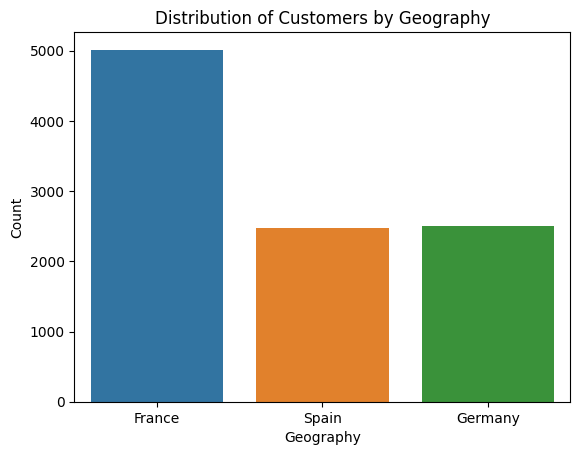

In [11]:
# Create a bar plot of Geography

sns.countplot(x='Geography', data=df)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Distribution of Customers by Geography')
plt.show()

### 3. Gender

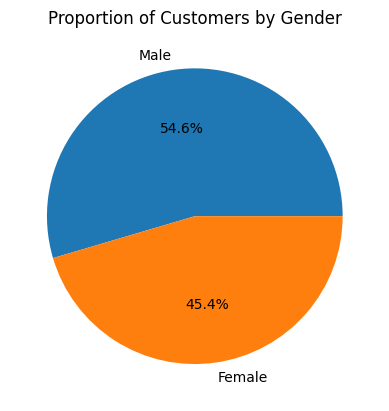

In [12]:
# Calculate the count of customers by Gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart of Gender
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Customers by Gender')
plt.show()

### 4. Age

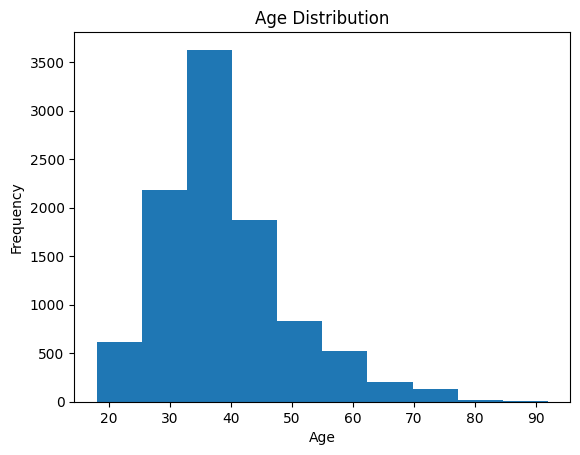

In [14]:
# Plot histogram of Age

plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

### 5. Tenure 

refers to the duration or length of time a customer has been associated with the bank or a specific product or service offered by the bank. It represents the length of the customer's relationship with the bank

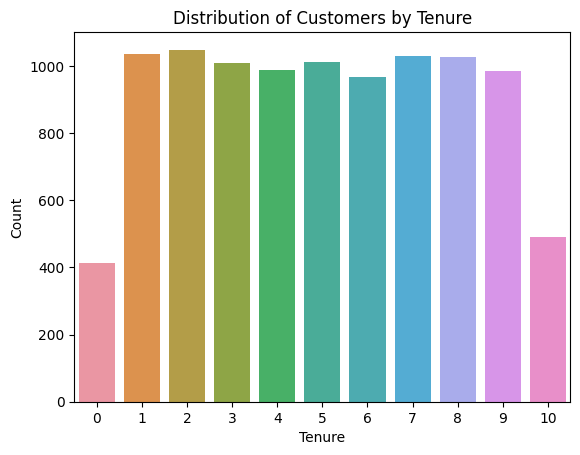

In [15]:
# Create a bar plot of Tenure

sns.countplot(x='Tenure', data=df)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Customers by Tenure')
plt.show()

### 6. Balance 

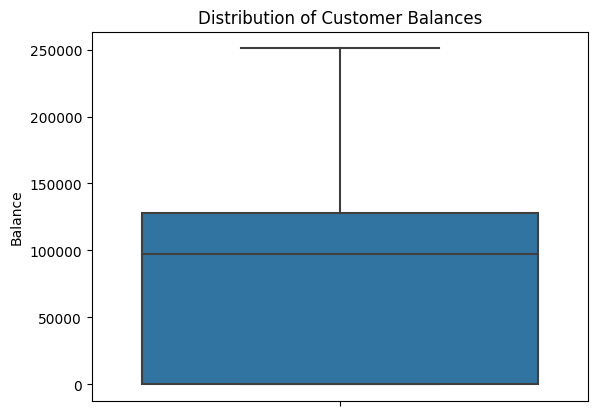

In [16]:
# Create a box plot of Balance

sns.boxplot(y='Balance', data=df)
plt.ylabel('Balance')
plt.title('Distribution of Customer Balances')
plt.show()

### 7. Number of Products

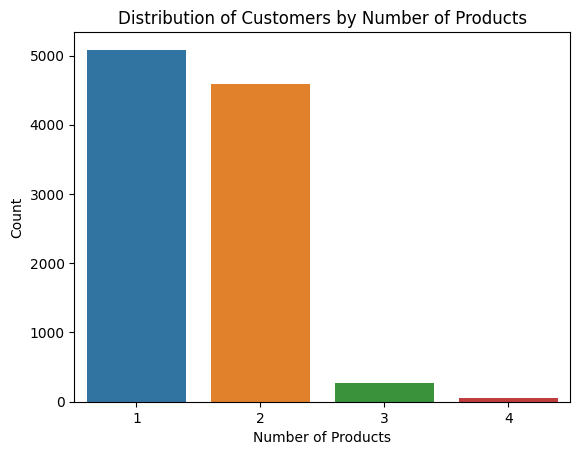

In [17]:
# Create a bar plot of NumOfProducts

sns.countplot(x='NumOfProducts', data=df)
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Distribution of Customers by Number of Products')
plt.show()

### 8. Has Credit Card 

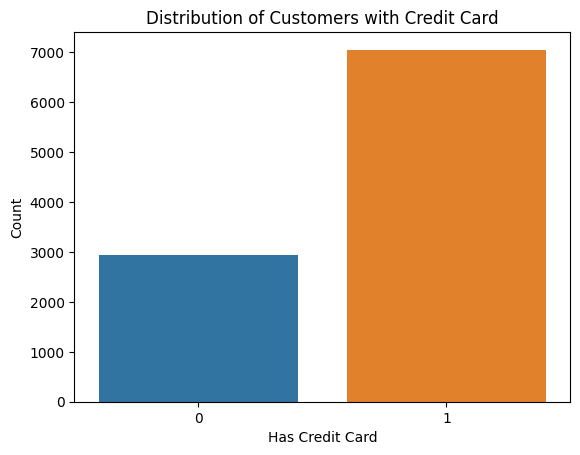

In [18]:
# Create a bar plot of HasCrCard
sns.countplot(x='HasCrCard', data=df)
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Distribution of Customers with Credit Card')
plt.show()

### 9. Is Active Member 

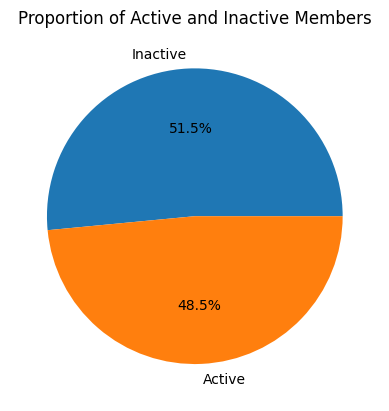

In [19]:
# Calculate the count of customers by IsActiveMember
is_active_counts = df['IsActiveMember'].value_counts()

# Create a pie chart of IsActiveMember
plt.pie(is_active_counts, labels=['Inactive', 'Active'], autopct='%1.1f%%')
plt.title('Proportion of Active and Inactive Members')
plt.show()

### 10. Estimated Salary

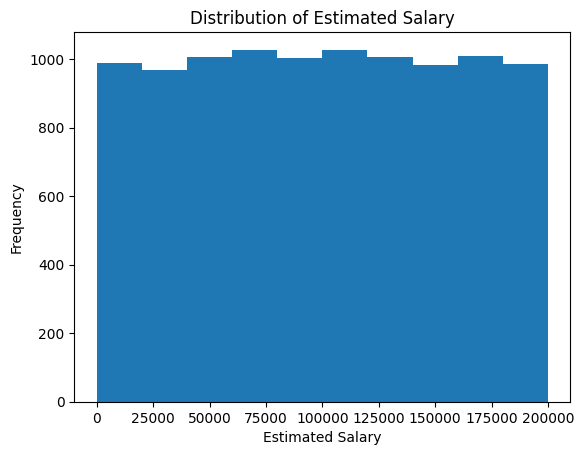

In [20]:
# Plotting a histogram for EstimatedSalary

plt.hist(df['EstimatedSalary'], bins=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Salary')
plt.show()

### 11. Exited - dependent variable

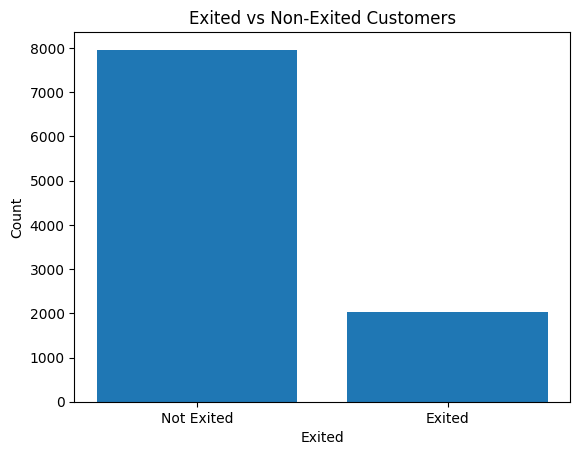

In [21]:
# Plotting a bar plot for Exited
exit_counts = df['Exited'].value_counts()
plt.bar(exit_counts.index, exit_counts.values)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Exited vs Non-Exited Customers')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

### 12. Complain 

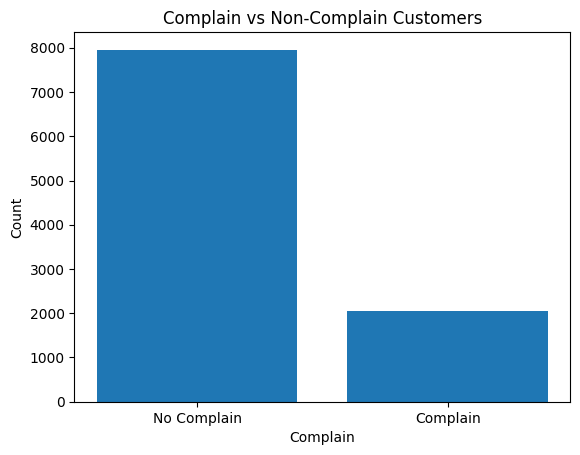

In [22]:
# Plotting a bar plot for Complain

complain_counts = df['Complain'].value_counts()
plt.bar(complain_counts.index, complain_counts.values)
plt.xlabel('Complain')
plt.ylabel('Count')
plt.title('Complain vs Non-Complain Customers')
plt.xticks([0, 1], ['No Complain', 'Complain'])
plt.show()

### 13. Satisfaction Score

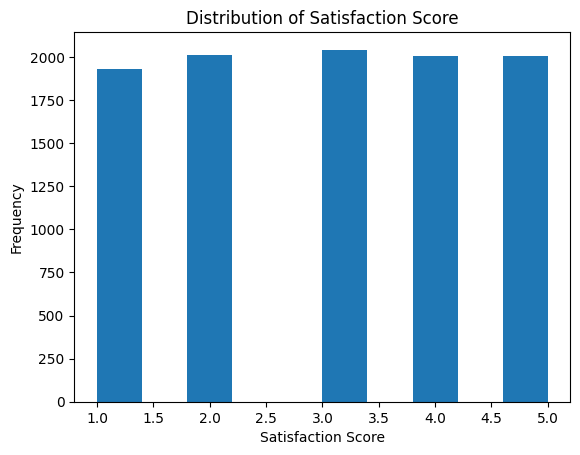

In [23]:
# Plotting a bar plot for Satisfaction Score 

plt.hist(df['Satisfaction Score'], bins=10)
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Score')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

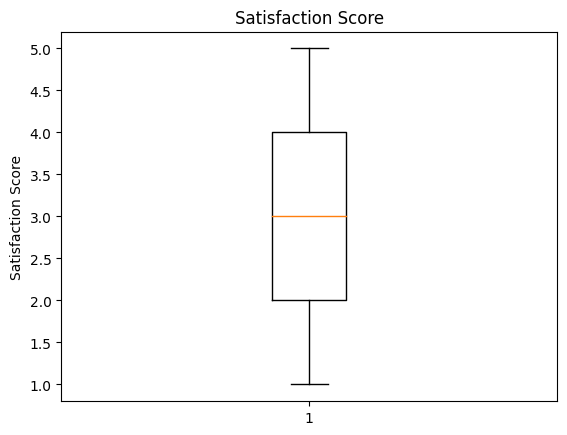

In [24]:
# Plotting a box plot for Satisfaction Score
plt.boxplot(df['Satisfaction Score'])
plt.ylabel('Satisfaction Score')
plt.title('Satisfaction Score')
plt.show

### 14. Card Type

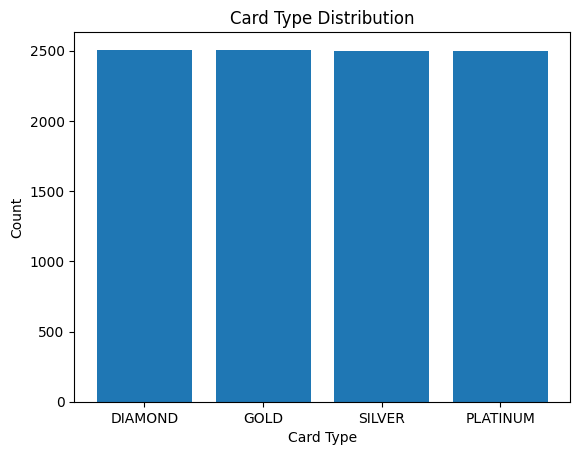

In [25]:
# Plotting a bar plot for Card Type

card_type_counts = df['Card Type'].value_counts()
plt.bar(card_type_counts.index, card_type_counts.values)
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Card Type Distribution')
plt.show()

### 15. Point Earned

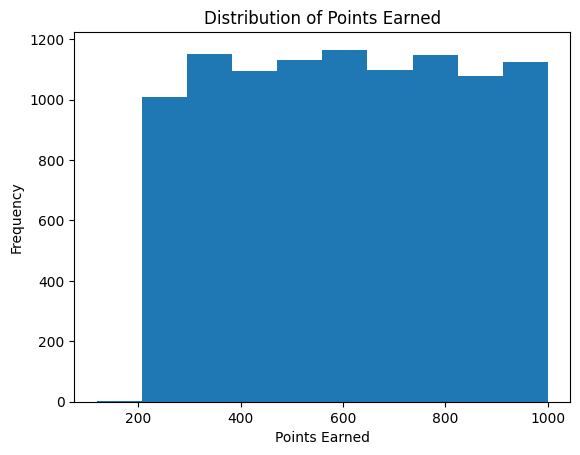

In [26]:
# Plotting a histogram for Point Earned
plt.hist(df['Point Earned'], bins=10)
plt.xlabel('Points Earned')
plt.ylabel('Frequency')
plt.title('Distribution of Points Earned')
plt.show()

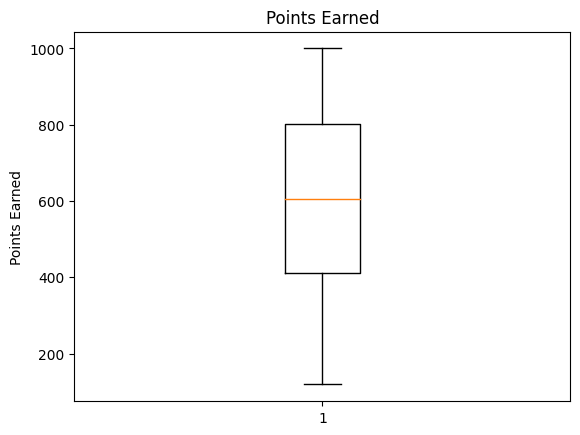

In [27]:
plt.boxplot(df['Point Earned'])
plt.ylabel('Points Earned')
plt.title('Points Earned')
plt.show()

### 4. Churn Rate Analysis

This is the process of analyzing and understanding the rate at which customers are leaving or "churning" from a product, service, or subscription over a specific period of time. This analysis provides valuable insights for businesses to understand customer attrition dynamics, make data driven decisions, and take proactive measures to retain customers and improve overall customer satisfaction and loyalty. 

In [27]:
# Calculate overall churn rate
overall_churn_rate = df['Exited'].mean() * 100

# Calculate churn rate by Geography
churn_rate_by_geography = df.groupby('Geography')['Exited'].mean() * 100

# Calculate churn rate by Gender
churn_rate_by_gender = df.groupby('Gender')['Exited'].mean() * 100

# Calculate churn rate by Tenure 
churn_rate_by_Tenure  = df.groupby('Tenure')['Exited'].mean() * 100

# Calculate churn rate by NumOfProducts
churn_rate_by_NumOfProducts = df.groupby('NumOfProducts')['Exited'].mean() * 100

# Calculate churn rate by HasCrCardAge
churn_rate_by_HasCrCard  = df.groupby('HasCrCard')['Exited'].mean() * 100

# Calculate churn rate by IsActiveMember
churn_rate_by_IsActiveMember  = df.groupby('IsActiveMember')['Exited'].mean() * 100

# Calculate churn rate by Complain
churn_rate_by_Complain = df.groupby('Complain')['Exited'].mean() * 100

# Calculate churn rate by Satisfaction Score
churn_rate_by_Satisfaction_Score = df.groupby('Satisfaction Score')['Exited'].mean() * 100

# Calculate churn rate by Card Type
churn_rate_by_card_type = df.groupby('Card Type')['Exited'].mean() * 100

In [29]:
# Print the churn rates
print("Churn Rate Analysis:")
print('Overall Churn Rate: {:.2f}%'.format(overall_churn_rate))

print('\nChurn Rate by Geography:')
print(churn_rate_by_geography)

print('\nChurn Rate by Gender:')
print(churn_rate_by_gender)

print('\nChurn Rate by Tenure:')
print(churn_rate_by_Tenure)

print('\nChurn Rate by NumOfProducts:')
print(churn_rate_by_NumOfProducts)

print('\nChurn Rate by HasCrCard :')
print(churn_rate_by_HasCrCard )

print('\nChurn Rate by IsActiveMember:')
print(churn_rate_by_IsActiveMember)

print('\nChurn Rate by Complain:')
print(churn_rate_by_Complain)

print('\nChurn Rate by Satisfaction Score :')
print(churn_rate_by_Satisfaction_Score )

print('\nChurn Rate by Card Type:')
print(churn_rate_by_card_type)


Churn Rate Analysis:
Overall Churn Rate: 20.38%

Churn Rate by Geography:
Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

Churn Rate by Gender:
Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64

Churn Rate by Tenure:
Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64

Churn Rate by NumOfProducts:
NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64

Churn Rate by HasCrCard :
HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64

Churn Rate by IsActiveMember:
IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64

Churn Rate by Complain:
Complain
0     0.050277
1    99.510763
Name: Exited, dtype: float64

Churn Rate by Satisfaction Score :
Satisfaction Score
1   

## Predictive Modeling 

This is a process in data science and machine learning that involves creating and deploying a mathematical model or algorithm to predict future outcomes or make informed predictions based on historical data. It is a key technique used to analyze patterns, relationships, and trends within data and make predictions or forecasts about unknown or future events.

### 1. Data Preprocessing 

#### Categorical Encoding

This is a process in data preprocessing that involves converting categorical variables into numerical representations that can be used as input in machine learning algorithms.

In [29]:
cat_cols = ["Geography", "Gender", "Card Type"]

enc = OrdinalEncoder()
df[cat_cols] = enc.fit_transform(df[cat_cols])

### 2. Model Training and Evaluation using Gradient Boosting 

In [30]:
# Training and Testing Split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Exited", axis=1), df["Exited"], test_size=0.20, random_state=42)

In [31]:
# Model Architecture 

model = XGBClassifier(
    n_estimators=750,
    max_depth=4,
    learning_rate=0.01,
)

In [32]:
# Model Training 

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="logloss",
    early_stopping_rounds=1000,
    verbose=100,
)

[0]	validation_0-logloss:0.68325


c:\Users\Karl Jade C. Silva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Karl Jade C. Silva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-logloss:0.20332
[200]	validation_0-logloss:0.07321
[300]	validation_0-logloss:0.02957
[400]	validation_0-logloss:0.01424
[500]	validation_0-logloss:0.00897
[600]	validation_0-logloss:0.00730
[700]	validation_0-logloss:0.00691
[749]	validation_0-logloss:0.00690


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
# Model Evaluation 

print(f"Best iteration: {model.best_iteration} - logloss: {model.best_score}")

Best iteration: 738 - logloss: 0.00689022985147312


In [34]:
y_pred = model.predict(X_test)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 99.90%


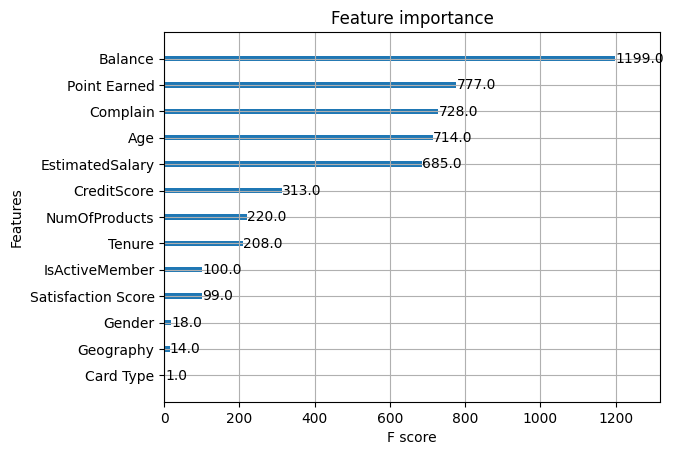

In [35]:
# Feature Importance 

xgb.plot_importance(model)
plt.show()

# Testing

In [36]:
import copy

subset = df.head(5) 
subset

df_copy = subset.copy()
df_copy

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1,1,2,0.0,464
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0,1,3,0.0,456
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1,1,3,0.0,377
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0,0,5,1.0,350
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0,0,5,1.0,425


In [37]:
df_copy.drop('Exited', axis=1, inplace=True)

In [58]:
# Assuming 'new_data' is the new data to be predicted

# Make predictions
predictions = model.predict(df_copy)

# Convert the predictions to human-readable labels
predicted_labels = ['Churn' if pred == 1 else 'Not Churn' for pred in predictions]

# Display the predicted labels
for label in predicted_labels:
    print(label)

Churn
Churn
Churn
Not Churn
Not Churn
